# Data Understanding
This dataset seems to contain employee satisfaction regarding their company. There are 12 columns which are:
- ID: This is the employee ID
- Company: Where the employee work (It is using ID not outright telling the name of the company)
- City: Where the company is located
- Touchpoint: Role of the employee
- Age: Employee range of age
- Employment: Range of how long is the employee employment
- Satisfaction: Satisfaction level (Puas, Biasa saja, Tidak puas)
- Recommend: How much would the employee recommend this (1-10)
- NPS: Net Promoter Score (Neutral, Detractor, Promoter)
- NPS_Score: 1 (Detractor), 2 (Neutral), 3 (Promoter)
- Reasons: Probably reason for the recommendation score, but could also be suggestions

# GOAL
- Create new variables as follows:
    - Label the new variable as NPS. Code 1 (Detractor) if Recommend < 6; code 2 (Neutral) if Recommend = 6-8, code 3 (Promoter)
    - Calculate NPS Score as: % Promoter - % Detractor (Let's create NPS score for the whole thing and for each company)
- Create charts in PowerPoint based on: City | Touchpoint | Age | Employment | Satisfaction | NPS
- Create 3 charts in PowerPoint based on: Reasons filtered on NPS (Detractor, Neutral, and Promoter)
- Create a Dashboard for the above variables, use Date as the filer (collapsed as Month)
- Check if Satisfaction and Recommendation are statistically significant by City and Age groups

# 1, Importing Data and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
#Size for graphs/visualization used
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

In [3]:
#Importing dataset
df = pd.read_excel("Sample_Dataset.xlsx")

In [4]:
#checking head
df.head()

,ID,Date,Company,City,Touchpoint,Age,Employment,Satisfaction,Recommend,NPS,NPS_Score,Reasons
0,1,20-01-05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,Neutral,0,"Untuk saat ini sudah baik, namun ada baiknya s..."
1,2,20-01-06,Customer 3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,Neutral,0,Perlu nya koordinasi yang bagus internal Mitra...
2,3,20-01-07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,Neutral,0,Terkait Perijinan dgn tower reseler (masih lam...
3,4,20-01-08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,Promoter,1,simplifikasi proses khusus utk site reseller
4,5,20-01-09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,Detractor,-1,"komunikasi ke customer, agar bisa lebih humble..."


In [5]:
#Checking tail
df.tail()

,ID,Date,Company,City,Touchpoint,Age,Employment,Satisfaction,Recommend,NPS,NPS_Score,Reasons
94,105,20-01-25,Customer_2,Jakarta,Sales & Marketing,< 5 Tahun,< 5 Tahun,Puas,7,Neutral,0,memperkuat database sehingga sewaktu klarifika...
95,106,20-01-26,Customer_2,Jakarta,Sales & Marketing,16 - 20 Tahun,< 5 Tahun,Puas,8,Neutral,0,Penambahan tim & kinerjanya
96,107,20-01-27,Customer_2,Jakarta,Sales & Marketing,11 - 15 Tahun,< 5 Tahun,Biasa saja,5,Detractor,-1,"tolong CLIENT HQ : Resposif , Solutif , koord..."
97,108,20-01-28,Customer_2,Jakarta,Sales & Marketing,16 - 20 Tahun,6 - 10 Tahun,Puas,9,Promoter,1,"pengelolaan database tower, sebagai produk yg ..."
98,110,20-01-30,Customer_4,Jakarta,Sales & Marketing,11 - 15 Tahun,< 5 Tahun,Puas,8,Neutral,0,Durasi proses finalisasi kontrak sampai dengan...


# 2. Data Profiling

In [6]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            99 non-null     int64 
 1   Date          99 non-null     object
 2   Company       99 non-null     object
 3   City          99 non-null     object
 4   Touchpoint    99 non-null     object
 5   Age           99 non-null     object
 6   Employment    99 non-null     object
 7   Satisfaction  99 non-null     object
 8   Recommend     99 non-null     int64 
 9   NPS           99 non-null     object
 10  NPS_Score     99 non-null     int64 
 11  Reasons       99 non-null     object
dtypes: int64(3), object(9)
memory usage: 9.4+ KB


In [7]:
df.shape

(99, 12)

There are 99 rows and 12 columns. From the 12, 3 are int and 9 are 0bject

In [8]:
#Checking null values
df.isnull().sum()

ID              0
Date            0
Company         0
City            0
Touchpoint      0
Age             0
Employment      0
Satisfaction    0
Recommend       0
NPS             0
NPS_Score       0
Reasons         0
dtype: int64

There are no null values

In [9]:
#Descriptive Profiling
df.describe()

,ID,Recommend,NPS_Score
count,99.000000,99.000000,99.000000
mean,53.909091,6.848485,-0.010101
std,31.957271,2.071988,0.707034
min,1.000000,0.000000,-1.000000
25%,26.500000,5.500000,-0.500000
50%,54.000000,7.000000,0.000000
75%,81.000000,8.000000,0.000000
max,110.000000,10.000000,1.000000


In [10]:
#Descriptive Profiling for object
df.describe(include='O')

,Date,Company,City,Touchpoint,Age,Employment,Satisfaction,NPS,Reasons
count,99,99,99,99,99,99,99,99,99
unique,78,5,16,2,10,5,5,3,98
top,20-01-05,Customer_2,Jakarta,Perizinan,36 - 40,6 - 10 Tahun,Puas,Neutral,Respond time
freq,2,37,32,79,33,31,50,50,2


Some insights:
1. The employees in this datasets are spread across 5 companies (Maybe we can make it into their own tables later)
2. There are only 2 roles in here
3. Most employees are age 36-40
4. Most employment already lasted for 6-10 years
5. Most feels satisfied

In [11]:
#Checking duplicate data
df[df.duplicated()]

,ID,Date,Company,City,Touchpoint,Age,Employment,Satisfaction,Recommend,NPS,NPS_Score,Reasons


There is no duplicate data

# 3, Feature Engineering and Adjustment
- Adjusting the date feature from object into datetime
- Making new NPS feature
- Making 2 new features for age
    - at_least
    - max
- Making 2 new features for employment
    - at least
    - max

In [12]:
df2 = df.copy()

In [13]:
#lowering the case of columns
df2.columns = df2.columns.str.lower()

In [14]:
df2.loc[df2['recommend']==0]

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,nps,nps_score,reasons
44,46,20-02-20,Customer_2,Bandung,Perizinan,41 - 45,> 25 Tahun,Sangat tidak puas,0,Detractor,-1,"Respon , kecepatn permit terutama.site reselle..."


In [15]:
#Changing 0 in recommend to 1
df2['recommend'] = df2['recommend'].replace(0,1)

This one person that rated recommend as '0' feels very not satisfied. The possibility rating for this would be 1-2 in the range of 10 scores. So, it is safe to change the rating to 1 so the data will be in range of 1-10.

Text(0, 0.5, 'Frekuensi')

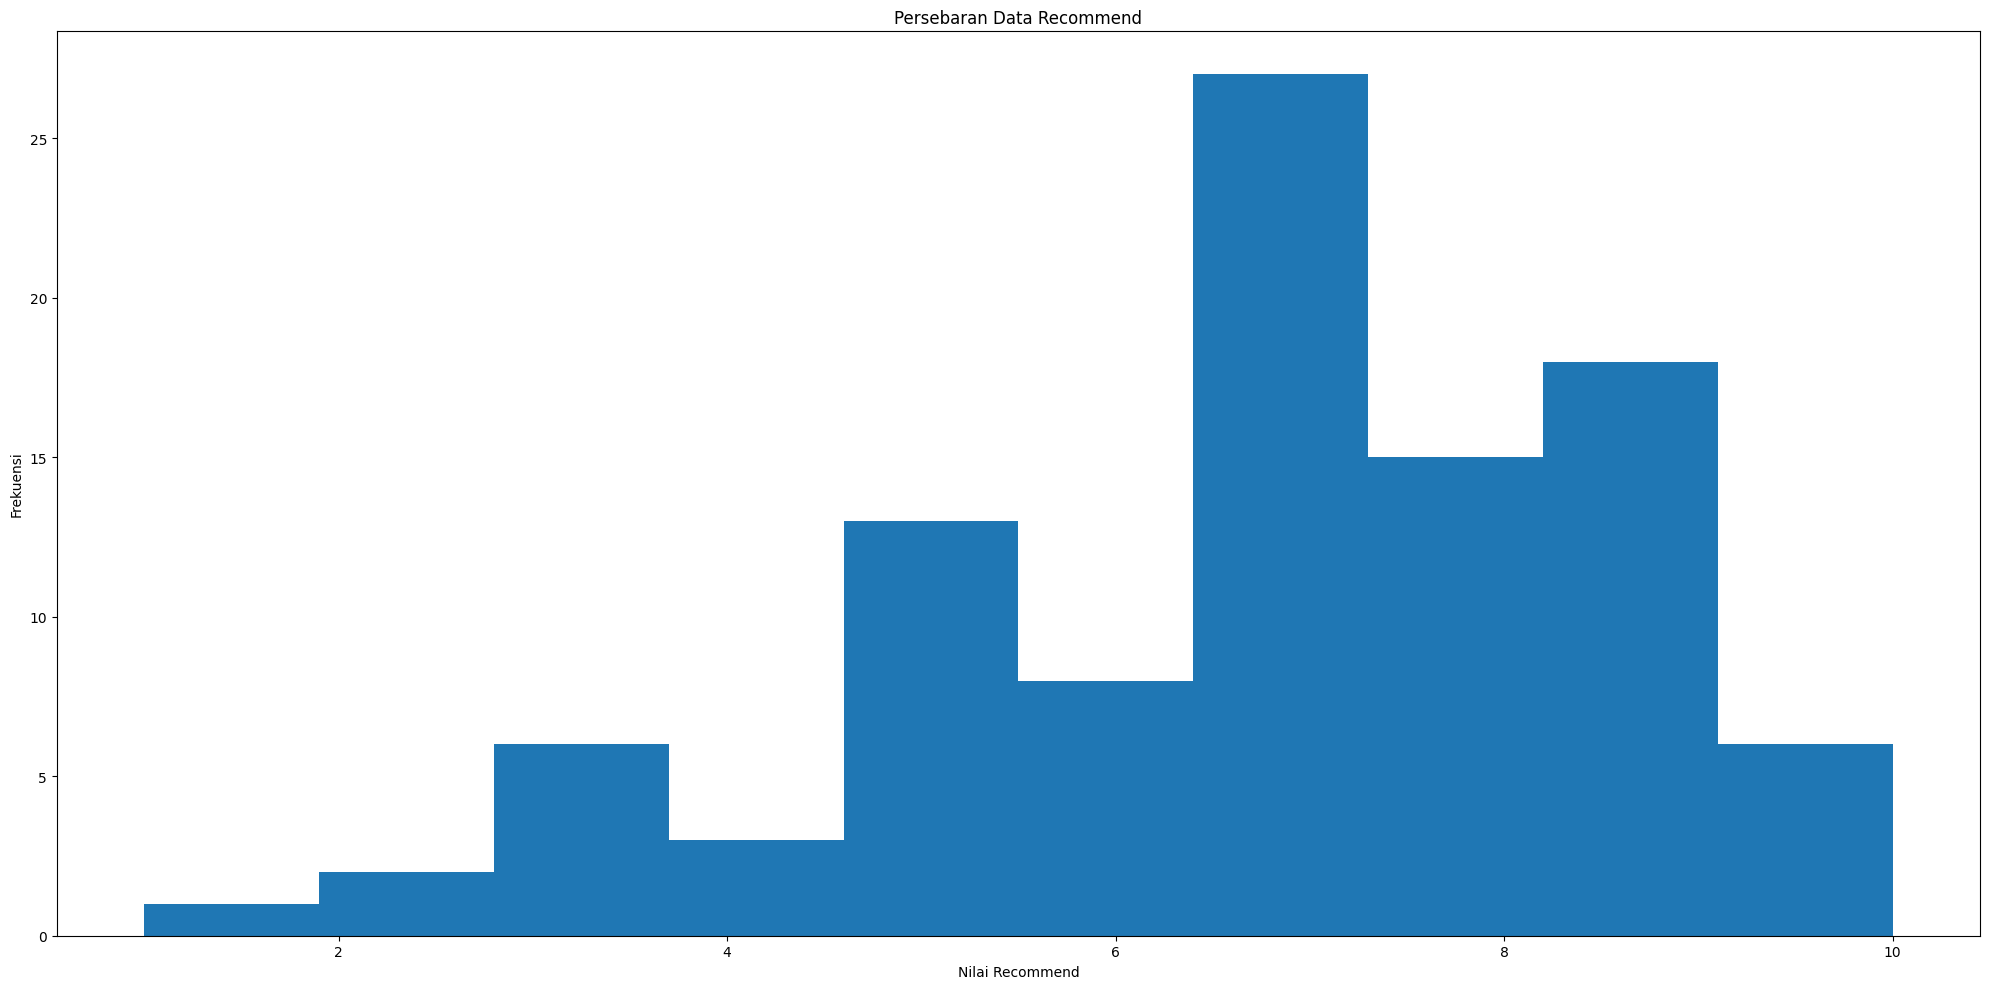

In [16]:
#persebaran data variabel recommend
plt.hist(df2['recommend'])
plt.title("Persebaran Data Recommend")
plt.xlabel("Nilai Recommend")
plt.ylabel("Frekuensi")

## Changing date to Datetime

In [17]:
df2.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,nps,nps_score,reasons
0,1,20-01-05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,Neutral,0,"Untuk saat ini sudah baik, namun ada baiknya s..."
1,2,20-01-06,Customer 3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,Neutral,0,Perlu nya koordinasi yang bagus internal Mitra...
2,3,20-01-07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,Neutral,0,Terkait Perijinan dgn tower reseler (masih lam...
3,4,20-01-08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,Promoter,1,simplifikasi proses khusus utk site reseller
4,5,20-01-09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,Detractor,-1,"komunikasi ke customer, agar bisa lebih humble..."


In [18]:
#Changing the dtype
df2['date'] = pd.to_datetime(df2['date'],format='%y-%m-%d')

#Changing the format
df2['date'] = df2['date'].dt.strftime('%y/%m/%d')

In [19]:
df2.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,nps,nps_score,reasons
0,1,20/01/05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,Neutral,0,"Untuk saat ini sudah baik, namun ada baiknya s..."
1,2,20/01/06,Customer 3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,Neutral,0,Perlu nya koordinasi yang bagus internal Mitra...
2,3,20/01/07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,Neutral,0,Terkait Perijinan dgn tower reseler (masih lam...
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,Promoter,1,simplifikasi proses khusus utk site reseller
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,Detractor,-1,"komunikasi ke customer, agar bisa lebih humble..."


## New NPS

In [20]:
#NPS Code
def nps_code(recommend):
    if recommend <6:
        return 1
    elif recommend >=6 and recommend <=8:
        return 2
    else:
        return 3

#Applying this
df2['nps_code'] = df2['recommend'].apply(nps_code)

In [21]:
#NPS Category
def nps_cat(recommend):
    if recommend <6:
        return 'Detractor'
    elif recommend >=6 and recommend <=8:
        return 'Neutral'
    else:
        return 'Promoter'
    
#Applying function
df2['nps_cat'] = df2['recommend'].apply(nps_cat)

In [22]:
#dropping nps and nps_score
df3 = df2.drop(columns=['nps','nps_score'],axis=1)

In [23]:
df3.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat
0,1,20/01/05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,"Untuk saat ini sudah baik, namun ada baiknya s...",2,Neutral
1,2,20/01/06,Customer 3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,Perlu nya koordinasi yang bagus internal Mitra...,2,Neutral
2,3,20/01/07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,Terkait Perijinan dgn tower reseler (masih lam...,2,Neutral
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,simplifikasi proses khusus utk site reseller,3,Promoter
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,"komunikasi ke customer, agar bisa lebih humble...",1,Detractor


## Age Feature

In [24]:
df3.age.unique()

array(['46 - 50', '36 - 40', '> 50', '41 - 45', '30 - 35',
       '16 - 20 Tahun', '< 5 Tahun', '11 - 15 Tahun', '6 - 10 Tahun',
       '> 25 Tahun'], dtype=object)

There is something weird here, there is no way a worker is aged under 16 as the law in Indonesia stated that at least you have to be 15 to work. To solve this, let's compare them with the working experience. Other than that, the range itself is not quite right. Let's fix some of the ranges

In [25]:
df3.loc[df3['age']=='> 25 Tahun']

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat
93,103,20/01/23,Customer_2,Jakarta,Sales & Marketing,> 25 Tahun,< 5 Tahun,Biasa saja,5,Inisiatif dan Proaktif,1,Detractor


In [26]:
df3.loc[df3['age']=='30 - 35']

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat
15,17,20/01/21,Customer_4,Surabaya,Perizinan,30 - 35,6 - 10 Tahun,Puas,7,Memberikan actual sesuai plan,2,Neutral
47,51,20/02/25,Customer 3,Jakarta,Perizinan,30 - 35,< 5 Tahun,Biasa saja,7,Tidak tahu,2,Neutral
50,55,20/03/01,Customer_4,Makassar,Perizinan,30 - 35,6 - 10 Tahun,Puas,7,Respon case sangat lambat,2,Neutral
52,58,20/03/04,Customer_2,Pekanbaru,Perizinan,30 - 35,11 - 15 Tahun,Biasa saja,7,Semangat untuk sebuah solusi,2,Neutral
57,63,20/03/09,Customer_2,Palembang,Perizinan,30 - 35,6 - 10 Tahun,Puas,8,Percepatan permit untuk site re-seller,2,Neutral
59,65,20/03/11,Customer_4,Bandung,Perizinan,30 - 35,6 - 10 Tahun,Puas,9,DIpermudah untuk proses request permit atau iz...,3,Promoter
66,72,20/03/18,Customer_2,Balikpapan,Perizinan,30 - 35,11 - 15 Tahun,Biasa saja,5,Respon dan delivery project lbh akurat,1,Detractor
75,83,20/03/29,Customer_2,Bandung,Perizinan,30 - 35,6 - 10 Tahun,Puas,7,"Percepatan proses CAF, Percepatan izin site2 ...",2,Neutral
78,86,20/01/06,Customer_2,Medan,Perizinan,30 - 35,6 - 10 Tahun,Biasa saja,6,Kerjasama dan fast respone,2,Neutral


The one with > 25 Tahun is only one, so I think it is okay to change it into 26-30. Other than that, the ranges are in the interval of 5. so we have to also change 30 - 35 into 31 - 35

In [27]:
df3['age'] = df3['age'].replace('> 25 Tahun','26 - 30')
df3['age'] = df3['age'].replace('30 - 35','31 - 35')
df3['age'] = df3['age'].replace('16 - 20 Tahun','16 - 20')

In [28]:
df3.loc[df3['age']=='30 - 35']

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat


now it is all adjusted, we can move on to the next problem

In [29]:
age = df3.loc[(df3['age']=='< 5 Tahun')|(df3['age']=='11 - 15 Tahun')|(df3['age']=='6 - 10 Tahun')]

In [30]:
age

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat
80,89,20/01/09,Customer 3,Jakarta,Sales & Marketing,< 5 Tahun,< 5 Tahun,Sangat puas,10,Sebaiknya unit Marketing mempunyai database ya...,3,Promoter
81,90,20/01/10,Customer_1,Bodetabek,Sales & Marketing,11 - 15 Tahun,6 - 10 Tahun,Puas,9,"Lebih Active dan coperative,",3,Promoter
82,92,20/01/12,Customer 3,Jakarta,Sales & Marketing,< 5 Tahun,< 5 Tahun,Sangat puas,9,Intensitas team sales CLIENT dalam melakukan k...,3,Promoter
83,93,20/01/13,Customer_2,Jakarta,Sales & Marketing,< 5 Tahun,< 5 Tahun,Puas,9,Untuk marketing dan sales regional yang berhub...,3,Promoter
84,94,20/01/14,Customer_4,Jakarta,Sales & Marketing,6 - 10 Tahun,6 - 10 Tahun,Sangat puas,10,Prosesnya agar lebih dipercepat lagi,3,Promoter
85,95,20/01/15,Customer_2,Jakarta,Sales & Marketing,< 5 Tahun,< 5 Tahun,Puas,8,Untuk team Marketing & sales regional sudah ba...,2,Neutral
86,96,20/01/16,Customer_2,Jakarta,Sales & Marketing,11 - 15 Tahun,< 5 Tahun,Sangat puas,9,Setingkat manager CLIENT terlalu sombong,3,Promoter
87,97,20/01/17,Customer_1,Jakarta,Sales & Marketing,6 - 10 Tahun,6 - 10 Tahun,Puas,8,Kelengkapan dan keakuratan database,2,Neutral
88,98,20/01/18,Customer_2,Jakarta,Sales & Marketing,< 5 Tahun,< 5 Tahun,Puas,7,"Kelengkapan data CLIENT harus lebih comply, Ko...",2,Neutral
90,100,20/01/20,Customer_2,Jakarta,Sales & Marketing,11 - 15 Tahun,< 5 Tahun,Puas,7,So far support tim marsal regional cukup baik ...,2,Neutral


In [31]:
df3.age.unique()

array(['46 - 50', '36 - 40', '> 50', '41 - 45', '31 - 35', '16 - 20',
       '< 5 Tahun', '11 - 15 Tahun', '6 - 10 Tahun', '26 - 30'],
      dtype=object)

The treshold used to adjust the ages is 16 as 16-20 is the smallest available and actually still make sense

In [32]:
#Age Adjustment
df3.loc[(df3['age'] == '< 5 Tahun') & (df3['employment'] == '< 5 Tahun'), 'age'] = '16 - 20'
df3.loc[(df3['age'] == '11 - 15 Tahun') & (df3['employment'] == '< 5 Tahun'), 'age'] = '16 - 20'
df3.loc[(df3['age'] == '11 - 15 Tahun') & (df3['employment'] == '6 - 10 Tahun'), 'age'] = '21 - 25'
df3.loc[(df3['age'] == '11 - 15 Tahun') & (df3['employment'] == '11 - 15 Tahun'), 'age'] = '26 - 30'
df3.loc[(df3['age'] == '6 - 10 Tahun') & (df3['employment'] == '6 - 10 Tahun'), 'age'] = '21 - 25'
df3.loc[(df3['age'] == '16 - 20 Tahun') & (df3['employment'] == '< 5 Tahun'), 'age'] = '16 - 20'

In [33]:
df3.age.unique()

array(['46 - 50', '36 - 40', '> 50', '41 - 45', '31 - 35', '16 - 20',
       '21 - 25', '26 - 30'], dtype=object)

As it is now adjusted, we can continue to feature engineering

In [34]:
def age_least(age):
    if age == '46 - 50':
        return 46
    elif age == '36 - 40':
        return 36
    elif age == '> 50':
        return 50
    elif age == '41 - 45':
        return 41
    elif age == '31 - 35':
        return 31
    elif age == '16 - 20':
        return 16
    elif age == '21 - 25':
        return 21
    else:
        return 26

def age_max(age):
    if age == '46 - 50':
        return 50
    elif age == '36 - 40':
        return 40
    elif age == '> 50':
        return np.nan
    elif age == '41 - 45':
        return 45
    elif age == '31 - 35':
        return 35
    elif age == '16 - 20':
        return 20
    elif age == '21 - 25':
        return 25
    else:
        return 30

df3['min_age'] = df3['age'].apply(age_least)
df3['max_age'] = df3['age'].apply(age_max)

In [35]:
df3.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat,min_age,max_age
0,1,20/01/05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,"Untuk saat ini sudah baik, namun ada baiknya s...",2,Neutral,46,50.0
1,2,20/01/06,Customer 3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,Perlu nya koordinasi yang bagus internal Mitra...,2,Neutral,36,40.0
2,3,20/01/07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,Terkait Perijinan dgn tower reseler (masih lam...,2,Neutral,50,NaN
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,simplifikasi proses khusus utk site reseller,3,Promoter,41,45.0
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,"komunikasi ke customer, agar bisa lebih humble...",1,Detractor,41,45.0


## Employment

In [36]:
df3.employment.unique()

array(['11 - 15 Tahun', '6 - 10 Tahun', '> 25 Tahun', '16 - 20 Tahun',
       '< 5 Tahun'], dtype=object)

Range is looking good

In [37]:
def exp_min(age):
    if age == '11 - 15 Tahun':
        return 11
    elif age == '6 - 10 Tahun':
        return 6
    elif age == '> 25 Tahun':
        return 25
    elif age == '16 - 20 Tahun':
        return 16
    else:
        return np.nan

def exp_max(age):
    if age == '11 - 15 Tahun':
        return 15
    elif age == '6 - 10 Tahun':
        return 10
    elif age == '> 25 Tahun':
        return np.nan
    elif age == '16 - 20 Tahun':
        return 20
    else:
        return 5

df3['min_emp'] = df3['employment'].apply(exp_min)
df3['max_emp'] = df3['employment'].apply(exp_max)

In [38]:
df3.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat,min_age,max_age,min_emp,max_emp
0,1,20/01/05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,"Untuk saat ini sudah baik, namun ada baiknya s...",2,Neutral,46,50.0,11.0,15.0
1,2,20/01/06,Customer 3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,Perlu nya koordinasi yang bagus internal Mitra...,2,Neutral,36,40.0,6.0,10.0
2,3,20/01/07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,Terkait Perijinan dgn tower reseler (masih lam...,2,Neutral,50,NaN,25.0,NaN
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,simplifikasi proses khusus utk site reseller,3,Promoter,41,45.0,16.0,20.0
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,"komunikasi ke customer, agar bisa lebih humble...",1,Detractor,41,45.0,6.0,10.0


## Company

In [39]:
df3.company.unique()

array(['Customer_1', 'Customer  3', 'Customer_2', 'Customer_4',
       'Customer_5'], dtype=object)

just a small hiccup, customer 3 got double space

In [40]:
df3['company'] = df3['company'].replace('Customer  3','Customer_3')

In [41]:
df3.company.unique()

array(['Customer_1', 'Customer_3', 'Customer_2', 'Customer_4',
       'Customer_5'], dtype=object)

# 4. Counting NPS Score
%Promotor - %Detractor

In [42]:
df4 = df3.copy()

In [43]:
df4.company.unique()

array(['Customer_1', 'Customer_3', 'Customer_2', 'Customer_4',
       'Customer_5'], dtype=object)

In [44]:
#Splitting per company
company_1 = df4.loc[df4['company'] == 'Customer_1']
company_2 = df4.loc[df4['company'] == 'Customer_2']
company_3 = df4.loc[df4['company'] == 'Customer_3']
company_4 = df4.loc[df4['company'] == 'Customer_4']
company_5 = df4.loc[df4['company'] == 'Customer_5']

In [45]:
#Calculating nps score in total and per company
# Calculate the percentage of promoters
promoter = len(df4[df4['nps_code'] == 3]) / len(df4) * 100
promoter1= len(company_1[company_1['nps_code']==3])/len(company_1)*100
promoter2= len(company_2[company_2['nps_code']==3])/len(company_2)*100
promoter3= len(company_3[company_3['nps_code']==3])/len(company_3)*100
promoter4= len(company_4[company_4['nps_code']==3])/len(company_4)*100
promoter5= len(company_5[company_5['nps_code']==3])/len(company_5)*100

# Calculate the percentage of detractors
detractor = len(df4[df4['nps_code'] == 1]) / len(df) * 100
detractor1= len(company_1[company_1['nps_code']==1])/len(company_1)*100
detractor2= len(company_2[company_2['nps_code']==1])/len(company_2)*100
detractor3= len(company_3[company_3['nps_code']==1])/len(company_3)*100
detractor4= len(company_4[company_4['nps_code']==1])/len(company_4)*100
detractor5= len(company_5[company_5['nps_code']==1])/len(company_5)*100

#Calculating the score
score = promoter - detractor
score1 = promoter1 - detractor1
score2 = promoter2 - detractor2
score3 = promoter3 - detractor3
score4 = promoter4 - detractor4
score5 = promoter5 - detractor5

In [46]:
#Showing the result
print('NPS Score:', score)
print('NPS Score Company 1:', score1)
print('NPS Score Company 2:', score2)
print('NPS Score Company 3:', score3)
print('NPS Score Company 4:', score4)
print('NPS Score Company 5:', score5)

NPS Score: -1.0101010101010104
NPS Score Company 1: 19.999999999999993
NPS Score Company 2: -10.810810810810814
NPS Score Company 3: 21.05263157894737
NPS Score Company 4: 6.666666666666668
NPS Score Company 5: -38.46153846153846


# 5. Statistical Significance

In [47]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [48]:
df5 = df4.copy()

In [49]:
df5.age.unique()

array(['46 - 50', '36 - 40', '> 50', '41 - 45', '31 - 35', '16 - 20',
       '21 - 25', '26 - 30'], dtype=object)

In [50]:
# Encoding "Satisfaction" column into numerical categories
satisfaction_mapping = {"Sangat puas": 5, "Puas": 4, "Biasa saja": 3, "Tidak puas": 2, "Sangat tidak puas": 1}
df5['Satisfaction_encoded'] = df5['satisfaction'].map(satisfaction_mapping)

# Encoding "Age" column into numerical categories
age_mapping = {
    '16 - 20': 1,
    '21 - 25': 2,
    '26 - 30': 3,
    '31 - 35': 4,
    '36 - 40': 5,
    '41 - 45': 6,
    '46 - 50': 7,
    '> 50': 8
}
df5['Age_encoded'] = df5['age'].map(age_mapping)

# Perform chi-square test for "Satisfaction" and "City" groups
cross_tab_satisfaction_city = pd.crosstab(df5['Satisfaction_encoded'], df5['city'])
chi2_satisfaction_city = chi2_contingency(cross_tab_satisfaction_city)
p_value_satisfaction_city = chi2_satisfaction_city[1]
is_significant_satisfaction_city = p_value_satisfaction_city < 0.05

# Perform chi-square test for "Recommend" and "City" groups
chi2_recommend_city = chi2_contingency(pd.crosstab(df5['recommend'], df5['city']))
p_value_recommend_city = chi2_recommend_city[1]
is_significant_recommend_city = p_value_recommend_city < 0.05

# Perform ANOVA test for "Satisfaction" and "Age" groups
f_statistic_satisfaction_age, p_value_satisfaction_age = f_oneway(df5['Satisfaction_encoded'], df5['Age_encoded'])
is_significant_satisfaction_age = p_value_satisfaction_age < 0.05

# Perform ANOVA test for "Recommend" and "Age" groups
f_statistic_recommend_age, p_value_recommend_age = f_oneway(df5['recommend'], df5['Age_encoded'])
is_significant_recommend_age = p_value_recommend_age < 0.05

# Print the results
print("Satisfaction and City:")
print("p-value:", p_value_satisfaction_city)
if is_significant_satisfaction_city:
    print("Statistically significant relationship between Satisfaction and City")
else:
    print("No statistically significant relationship between Satisfaction and City")
print()

print("Recommend and City:")
print("p-value:", p_value_recommend_city)
if is_significant_recommend_city:
    print("Statistically significant relationship between Recommend and City")
else:
    print("No statistically significant relationship between Recommend and City")
print()

print("Satisfaction and Age:")
print("p-value:", p_value_satisfaction_age)
if is_significant_satisfaction_age:
    print("Statistically significant relationship between Satisfaction and Age")
else:
    print("No statistically significant relationship between Satisfaction and Age")
print()

print("Recommend and Age:")
print("p-value:", p_value_recommend_age)
if is_significant_recommend_age:
    print("Statistically significant relationship between Recommend and Age")
else:
    print("No statistically significant relationship between Recommend and Age")


Satisfaction and City:
p-value: 0.2811883141728194
No statistically significant relationship between Satisfaction and City

Recommend and City:
p-value: 0.7529245803564034
No statistically significant relationship between Recommend and City

Satisfaction and Age:
p-value: 4.185583031960487e-08
Statistically significant relationship between Satisfaction and Age

Recommend and Age:
p-value: 8.18073000514898e-12
Statistically significant relationship between Recommend and Age


## Satisfaction and Recommend

In [51]:
# Encode "Satisfaction" variable into numerical ranks
satisfaction_ranks = {'Sangat puas': 5, 'Puas': 4, 'Biasa saja': 3, 'Tidak puas': 2, 'Sangat tidak puas': 1}
df5['Satisfaction_encoded'] = df5['satisfaction'].map(satisfaction_ranks)

# Perform Spearman's rank correlation analysis
correlation, p_value = stats.spearmanr(df5['Satisfaction_encoded'], df5['recommend'])

# Print the results
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant relationship between Satisfaction and Recommend")
else:
    print("There is no statistically significant relationship between Satisfaction and Recommend")


Correlation coefficient: 0.8904450664076805
p-value: 6.197196779839294e-35
There is a statistically significant relationship between Satisfaction and Recommend


### City with Satisfaction and Recommend

In [52]:

# Perform chi-square test for "Satisfaction" and "City" groups
cross_tab_satisfaction_city = pd.crosstab(df5['Satisfaction_encoded'], df5['city'])
chi2_satisfaction_city, p_value_satisfaction_city, _, _ = chi2_contingency(cross_tab_satisfaction_city)

# Perform chi-square test for "Recommend" and "City" groups
cross_tab_recommend_city = pd.crosstab(df5['recommend'], df5['city'])
chi2_recommend_city, p_value_recommend_city, _, _ = chi2_contingency(cross_tab_recommend_city)

# Print the results
print("Satisfaction and City:")
print("Chi-square statistic:", chi2_satisfaction_city)
print("p-value:", p_value_satisfaction_city)
if p_value_satisfaction_city < 0.05:
    print("Statistically significant relationship between Satisfaction and City")
else:
    print("No statistically significant relationship between Satisfaction and City")
print()

print("Recommend and City:")
print("Chi-square statistic:", chi2_recommend_city)
print("p-value:", p_value_recommend_city)
if p_value_recommend_city < 0.05:
    print("Statistically significant relationship between Recommend and City")
else:
    print("No statistically significant relationship between Recommend and City")


Satisfaction and City:
Chi-square statistic: 65.86503472222222
p-value: 0.2811883141728194
No statistically significant relationship between Satisfaction and City

Recommend and City:
Chi-square statistic: 123.44095308048432
p-value: 0.7529245803564034
No statistically significant relationship between Recommend and City


### Age with Satisfaction and Recommend

In [53]:

# Perform chi-square test for "Satisfaction" and "City" groups
cross_tab_satisfaction_city = pd.crosstab(df5['Satisfaction_encoded'], df5['age'])
chi2_satisfaction_city, p_value_satisfaction_city, _, _ = chi2_contingency(cross_tab_satisfaction_city)

# Perform chi-square test for "Recommend" and "City" groups
cross_tab_recommend_city = pd.crosstab(df5['recommend'], df5['age'])
chi2_recommend_city, p_value_recommend_city, _, _ = chi2_contingency(cross_tab_recommend_city)

# Print the results
print("Satisfaction and City:")
print("Chi-square statistic:", chi2_satisfaction_city)
print("p-value:", p_value_satisfaction_city)
if p_value_satisfaction_city < 0.05:
    print("Statistically significant relationship between Satisfaction and age")
else:
    print("No statistically significant relationship between Satisfaction and age")
print()

print("Recommend and City:")
print("Chi-square statistic:", chi2_recommend_city)
print("p-value:", p_value_recommend_city)
if p_value_recommend_city < 0.05:
    print("Statistically significant relationship between Recommend and age")
else:
    print("No statistically significant relationship between Recommend and age")


Satisfaction and City:
Chi-square statistic: 33.141350649350656
p-value: 0.23057849401147207
No statistically significant relationship between Satisfaction and age

Recommend and City:
Chi-square statistic: 51.734171754171754
p-value: 0.8438080783480095
No statistically significant relationship between Recommend and age


# 6. Reasons Processing

In [54]:
df6 = df4.copy()
df6.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat,min_age,max_age,min_emp,max_emp
0,1,20/01/05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,"Untuk saat ini sudah baik, namun ada baiknya s...",2,Neutral,46,50.0,11.0,15.0
1,2,20/01/06,Customer_3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,Perlu nya koordinasi yang bagus internal Mitra...,2,Neutral,36,40.0,6.0,10.0
2,3,20/01/07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,Terkait Perijinan dgn tower reseler (masih lam...,2,Neutral,50,NaN,25.0,NaN
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,simplifikasi proses khusus utk site reseller,3,Promoter,41,45.0,16.0,20.0
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,"komunikasi ke customer, agar bisa lebih humble...",1,Detractor,41,45.0,6.0,10.0


In [55]:
#let's make the reasons all lower case
df6['reasons'] = df6['reasons'].str.lower()

In [56]:
df6.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat,min_age,max_age,min_emp,max_emp
0,1,20/01/05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,"untuk saat ini sudah baik, namun ada baiknya s...",2,Neutral,46,50.0,11.0,15.0
1,2,20/01/06,Customer_3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,perlu nya koordinasi yang bagus internal mitra...,2,Neutral,36,40.0,6.0,10.0
2,3,20/01/07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,terkait perijinan dgn tower reseler (masih lam...,2,Neutral,50,NaN,25.0,NaN
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,simplifikasi proses khusus utk site reseller,3,Promoter,41,45.0,16.0,20.0
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,"komunikasi ke customer, agar bisa lebih humble...",1,Detractor,41,45.0,6.0,10.0


## Counting top reasons for nps_cat

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the reasons column in each filtered dataset
reasons_detractor = df6[df6['nps_cat'] == 'Detractor']['reasons']
reasons_neutral = df6[df6['nps_cat'] == 'Neutral']['reasons']
reasons_promoter = df6[df6['nps_cat'] == 'Promoter']['reasons']

# Fit the vectorizer on the reasons data
reasons_detractor_vectorized = vectorizer.fit_transform(reasons_detractor)
reasons_neutral_vectorized = vectorizer.fit_transform(reasons_neutral)
reasons_promoter_vectorized = vectorizer.fit_transform(reasons_promoter)

# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names()

# Get the count of each feature in the reasons data
reasons_detractor_counts = reasons_detractor_vectorized.sum(axis=0).A1
reasons_neutral_counts = reasons_neutral_vectorized.sum(axis=0).A1
reasons_promoter_counts = reasons_promoter_vectorized.sum(axis=0).A1

# Create a dictionary of feature names and their counts
reasons_detractor_data = dict(zip(feature_names, reasons_detractor_counts))
reasons_neutral_data = dict(zip(feature_names, reasons_neutral_counts))
reasons_promoter_data = dict(zip(feature_names, reasons_promoter_counts))

# Sort the dictionaries based on the counts
reasons_detractor_sorted = sorted(reasons_detractor_data.items(), key=lambda x: x[1], reverse=True)
reasons_neutral_sorted = sorted(reasons_neutral_data.items(), key=lambda x: x[1], reverse=True)
reasons_promoter_sorted = sorted(reasons_promoter_data.items(), key=lambda x: x[1], reverse=True)

# Print the top reasons for each NPS category
print("Top reasons for Detractors:")
for reason, count in reasons_detractor_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Neutral:")
for reason, count in reasons_neutral_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Promoters:")
for reason, count in reasons_promoter_sorted[:10]:
    print(reason, count)
print()


Top reasons for Detractors:
di 11
hq 10
jabotabek 7
lokasi 7
beberapa 6
izin 6
diselesaikan 5
online 5
proses 5
akan 4

Top reasons for Neutral:
kasus 9
ditawarkan 7
produk 7
komunikasi 6
rilis 6
terkendala 6
approval 5
dan 5
sudah 5
bagus 4

Top reasons for Promoters:
permit 11
site 7
untuk 7
dan 6
proses 6
lebih 4
yang 4
by 3
client 3
dengan 3



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


C:\Users\user\AppData\Local\Temp\ipykernel_9512\2236317727.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_reasons = reasons_detractor.append(reasons_neutral).append(reasons_promoter)
C:\Users\user\AppData\Local\Temp\ipykernel_9512\2236317727.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_reasons = reasons_detractor.append(reasons_neutral).append(reasons_promoter)


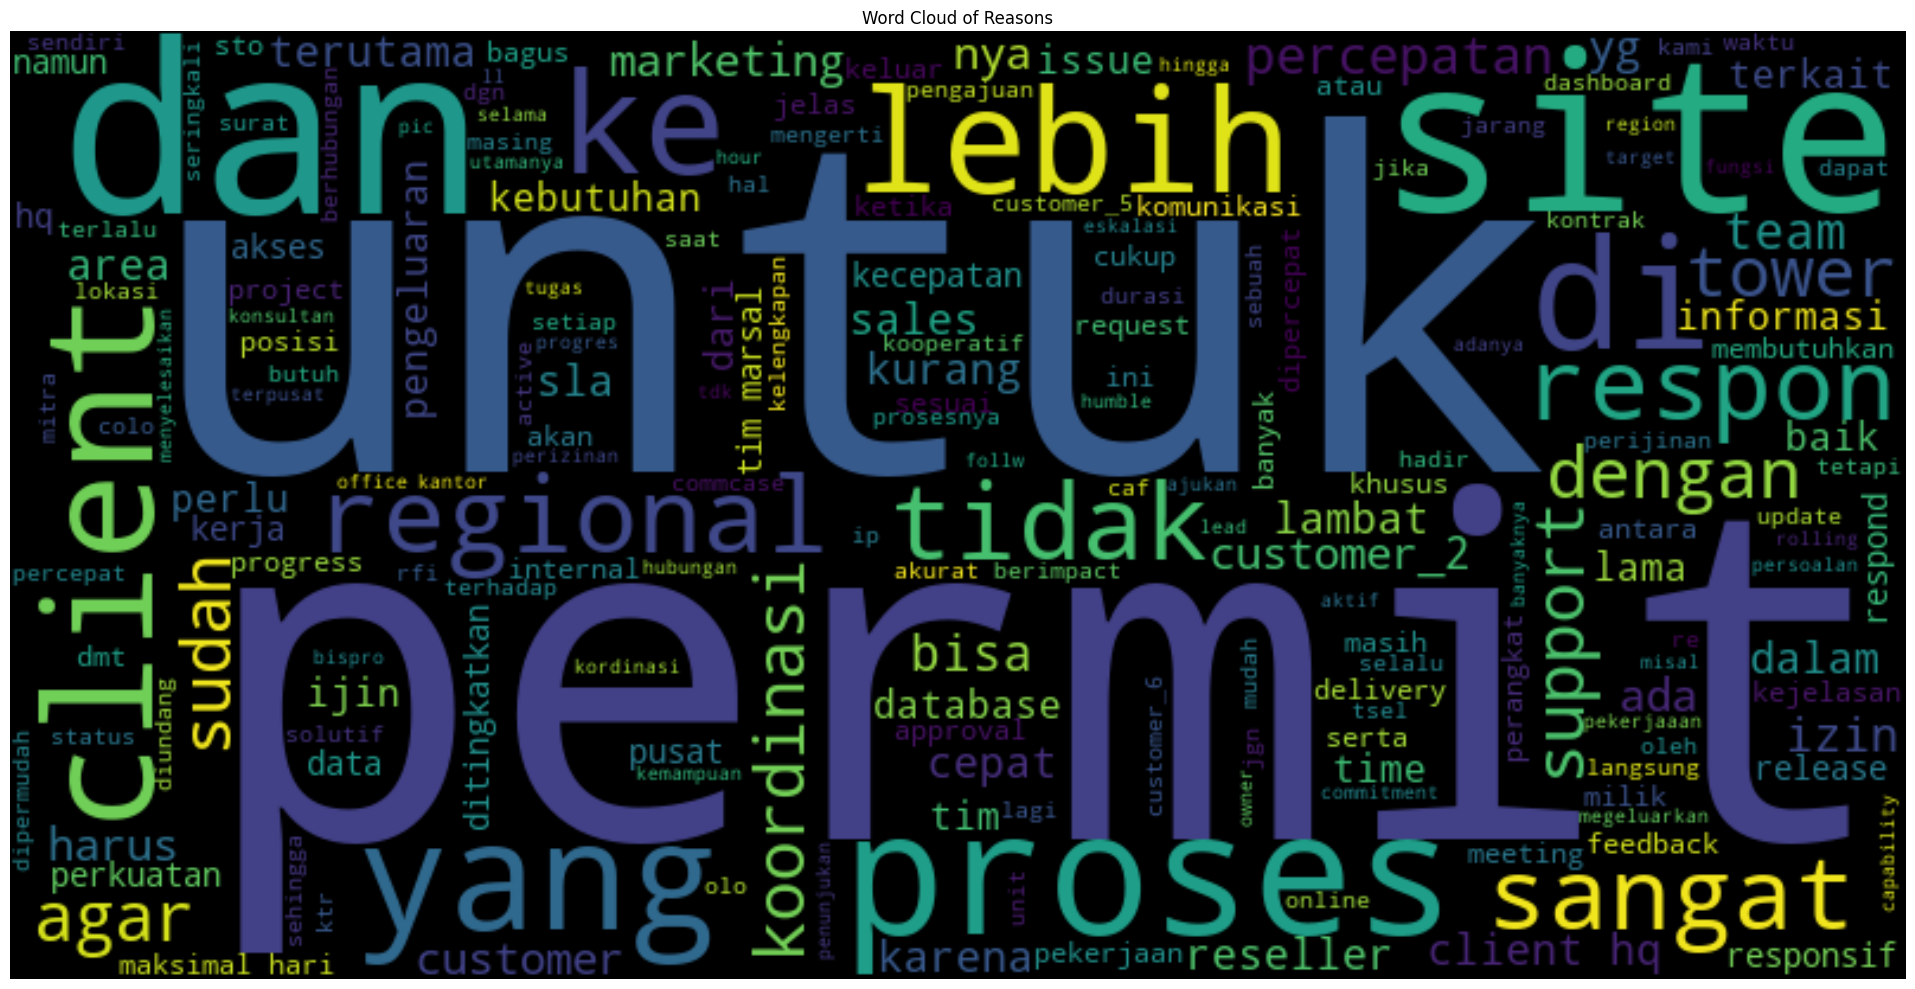

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter the dataset based on NPS categories (Detractor, Neutral, Promoter)
reasons_detractor = df6[df6['nps_cat'] == 'Detractor']['reasons']
reasons_neutral = df6[df6['nps_cat'] == 'Neutral']['reasons']
reasons_promoter = df6[df6['nps_cat'] == 'Promoter']['reasons']

# Combine reasons for all NPS categories
combined_reasons = reasons_detractor.append(reasons_neutral).append(reasons_promoter)

# Convert the combined reasons data to a single string
combined_reasons_text = ' '.join(combined_reasons)

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_reasons_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reasons')
plt.show()


## Neutral Wordcloud

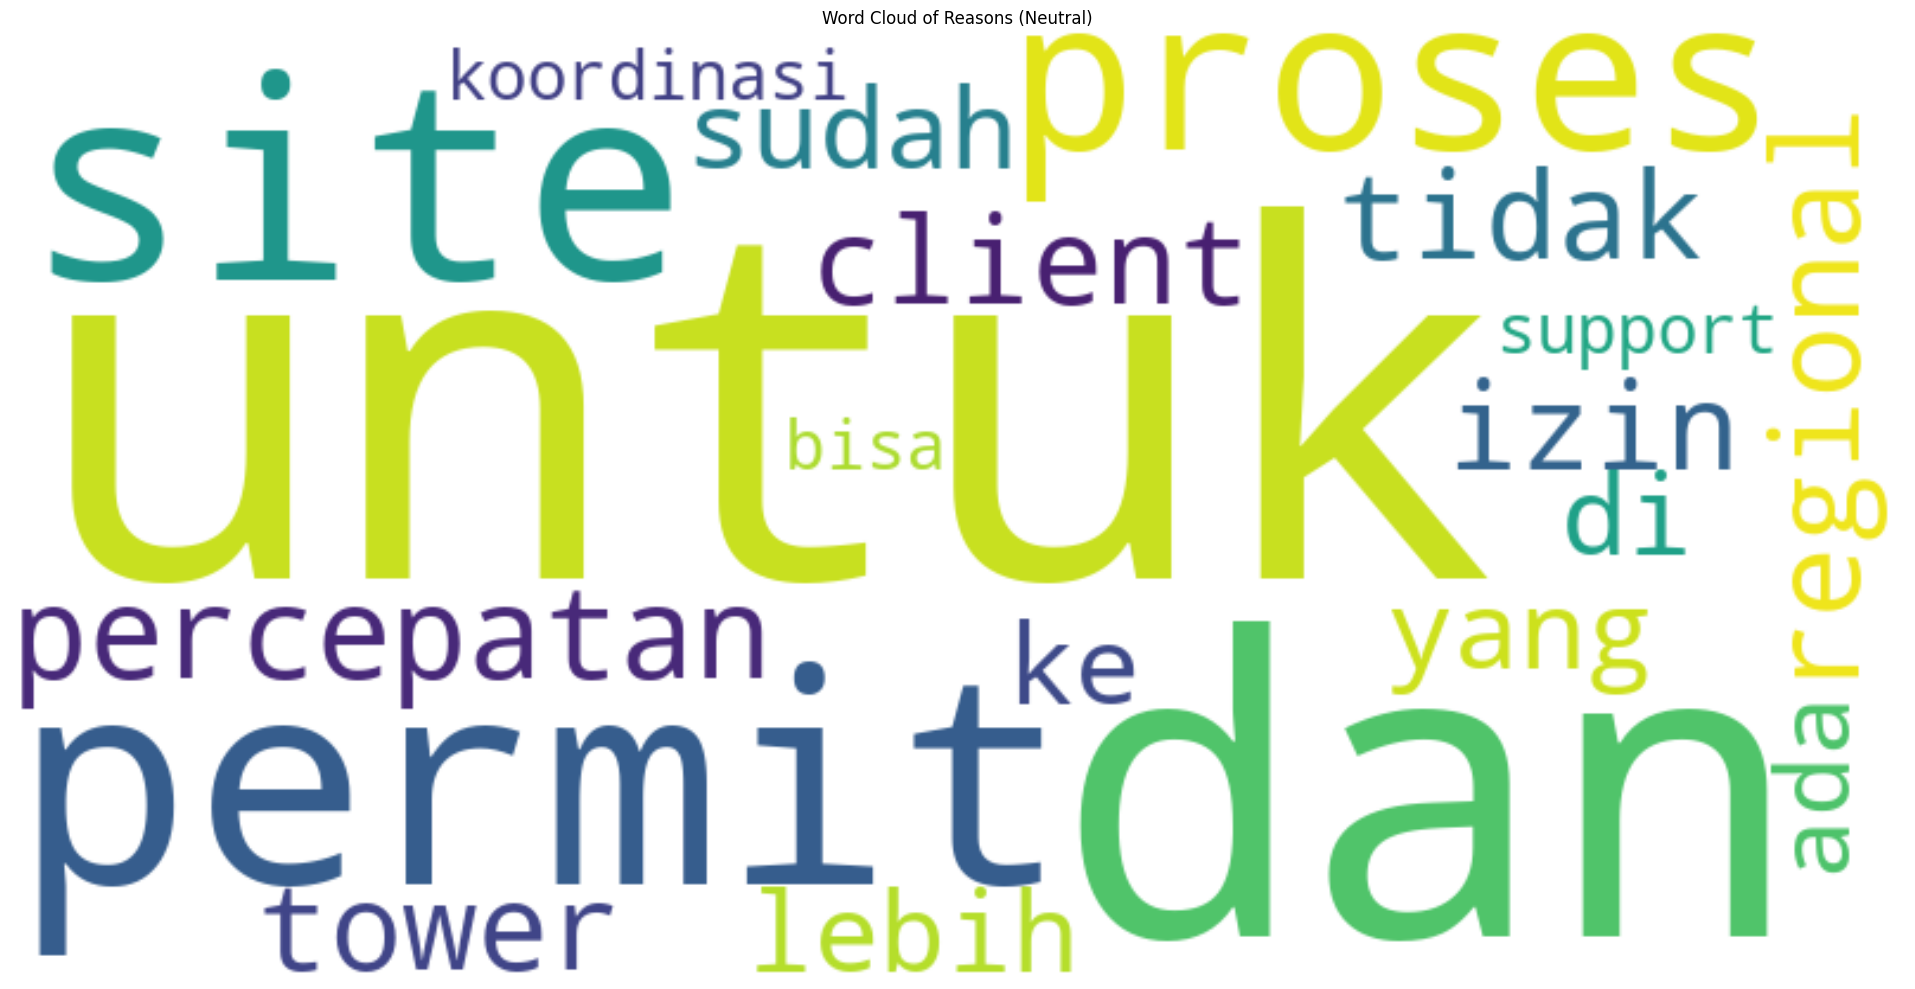

In [59]:
# Filter the dataset for the "Neutral" category
reasons_neutral = df6[df6['nps_cat'] == 'Neutral']['reasons']

# Combine the reasons for the "Neutral" category
combined_reasons_neutral = ' '.join(reasons_neutral)

# Create a WordCloud object and generate the word cloud for the "Neutral" reasons
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=20).generate(combined_reasons_neutral)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reasons (Neutral)')
plt.show()

In [60]:
df6.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat,min_age,max_age,min_emp,max_emp
0,1,20/01/05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,"untuk saat ini sudah baik, namun ada baiknya s...",2,Neutral,46,50.0,11.0,15.0
1,2,20/01/06,Customer_3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,perlu nya koordinasi yang bagus internal mitra...,2,Neutral,36,40.0,6.0,10.0
2,3,20/01/07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,terkait perijinan dgn tower reseler (masih lam...,2,Neutral,50,NaN,25.0,NaN
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,simplifikasi proses khusus utk site reseller,3,Promoter,41,45.0,16.0,20.0
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,"komunikasi ke customer, agar bisa lebih humble...",1,Detractor,41,45.0,6.0,10.0


In [61]:
neuword = df6.loc[(df6['nps_cat']=='Neutral')&(df6['reasons'].str.contains('client|tower|permit|kordinasi|izin|proses|site'))]

In [62]:
export = neuword[['id','company','satisfaction','recommend','reasons']]

In [63]:
# #Create the writer
# writer = pd.ExcelWriter('neutral_reasons.xlsx', engine='openpyxl')

# #Explrting datasets into excel sheets
# with pd.ExcelWriter('neutral_reasons.xlsx', engine='openpyxl') as writer:
#     export.to_excel(writer,sheet_name='clean_data',index=False)

## Detractor Wordcloud

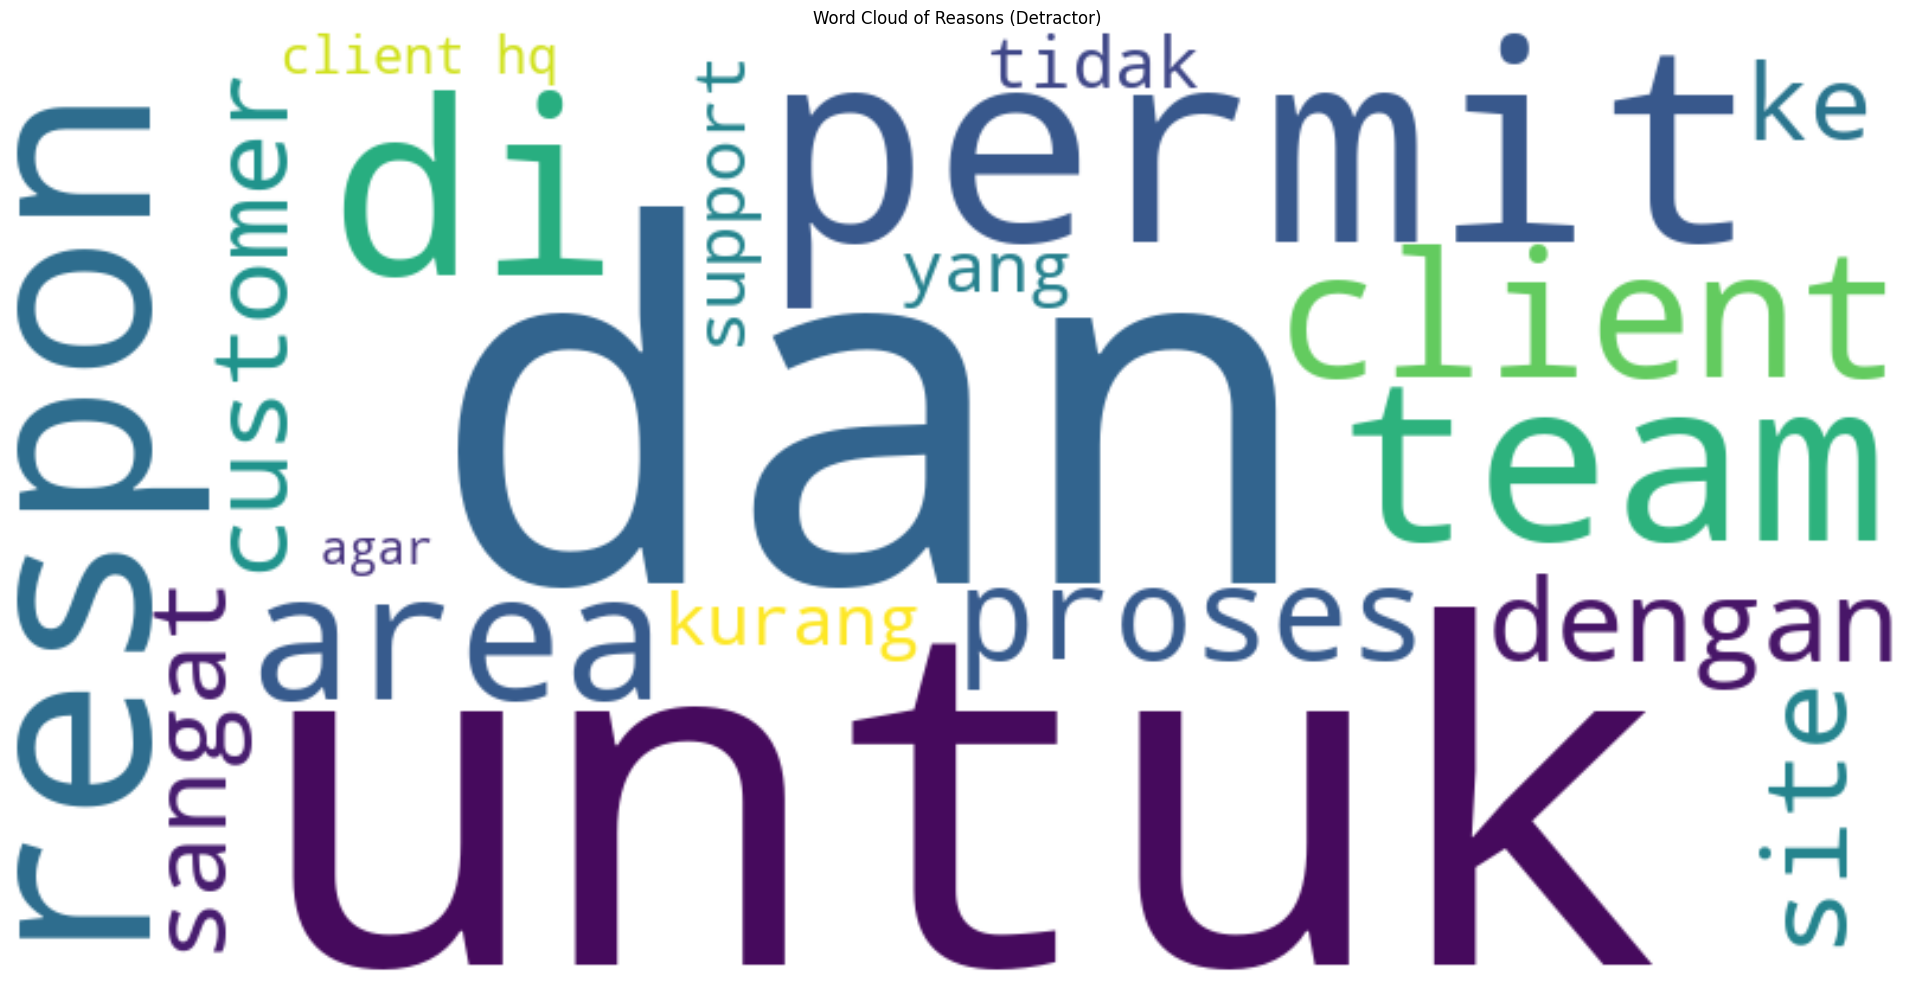

In [64]:
# Filter the dataset for the "Neutral" category
reasons_det = df6[df6['nps_cat'] == 'Detractor']['reasons']

# Combine the reasons for the "Neutral" category
combined_reasons_neutral = ' '.join(reasons_det)

# Create a WordCloud object and generate the word cloud for the "Neutral" reasons
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=20).generate(combined_reasons_neutral)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reasons (Detractor)')
plt.show()

In [65]:
df6.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat,min_age,max_age,min_emp,max_emp
0,1,20/01/05,Customer_1,Banjarmasin,Perizinan,46 - 50,11 - 15 Tahun,Puas,8,"untuk saat ini sudah baik, namun ada baiknya s...",2,Neutral,46,50.0,11.0,15.0
1,2,20/01/06,Customer_3,Bodetabek,Perizinan,36 - 40,6 - 10 Tahun,Puas,7,perlu nya koordinasi yang bagus internal mitra...,2,Neutral,36,40.0,6.0,10.0
2,3,20/01/07,Customer_2,Semarang,Perizinan,> 50,> 25 Tahun,Puas,7,terkait perijinan dgn tower reseler (masih lam...,2,Neutral,50,NaN,25.0,NaN
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,simplifikasi proses khusus utk site reseller,3,Promoter,41,45.0,16.0,20.0
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,"komunikasi ke customer, agar bisa lebih humble...",1,Detractor,41,45.0,6.0,10.0


In [66]:
detword = df6.loc[(df6['nps_cat']=='Detractor') & (df6['reasons'].str.contains('client|customer|permit|team|team|site|support|respon|proses|area'))]

In [67]:
detword.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat,min_age,max_age,min_emp,max_emp
4,5,20/01/09,Customer_4,Jakarta,Perizinan,41 - 45,6 - 10 Tahun,Biasa saja,5,"komunikasi ke customer, agar bisa lebih humble...",1,Detractor,41,45.0,6.0,10.0
6,7,20/01/11,Customer_2,Balikpapan,Perizinan,36 - 40,11 - 15 Tahun,Tidak puas,4,feedback & kordinasi ke customer sangat kurang...,1,Detractor,36,40.0,11.0,15.0
12,14,20/01/18,Customer_3,Jakarta,Perizinan,> 50,6 - 10 Tahun,Tidak puas,3,respons yang cepat dari team client untuk seti...,1,Detractor,50,NaN,6.0,10.0
14,16,20/01/20,Customer_4,Jakarta,Perizinan,36 - 40,6 - 10 Tahun,Biasa saja,5,respond team yang cepat dalam megeluarkan permit,1,Detractor,36,40.0,6.0,10.0
20,22,20/01/26,Customer_4,Jakarta,Perizinan,36 - 40,6 - 10 Tahun,Biasa saja,5,"1. target pekerjaaan harus sesuai, jgn lambat ...",1,Detractor,36,40.0,6.0,10.0


In [68]:
export = detword[['id','company','satisfaction','recommend','reasons']]

In [69]:
# #Create the writer
# writer = pd.ExcelWriter('detractor_reasons.xlsx', engine='openpyxl')

# #Explrting datasets into excel sheets
# with pd.ExcelWriter('detractor_reasons.xlsx', engine='openpyxl') as writer:
#     export.to_excel(writer,sheet_name='clean_data',index=False)

## Promoter Wordcloud

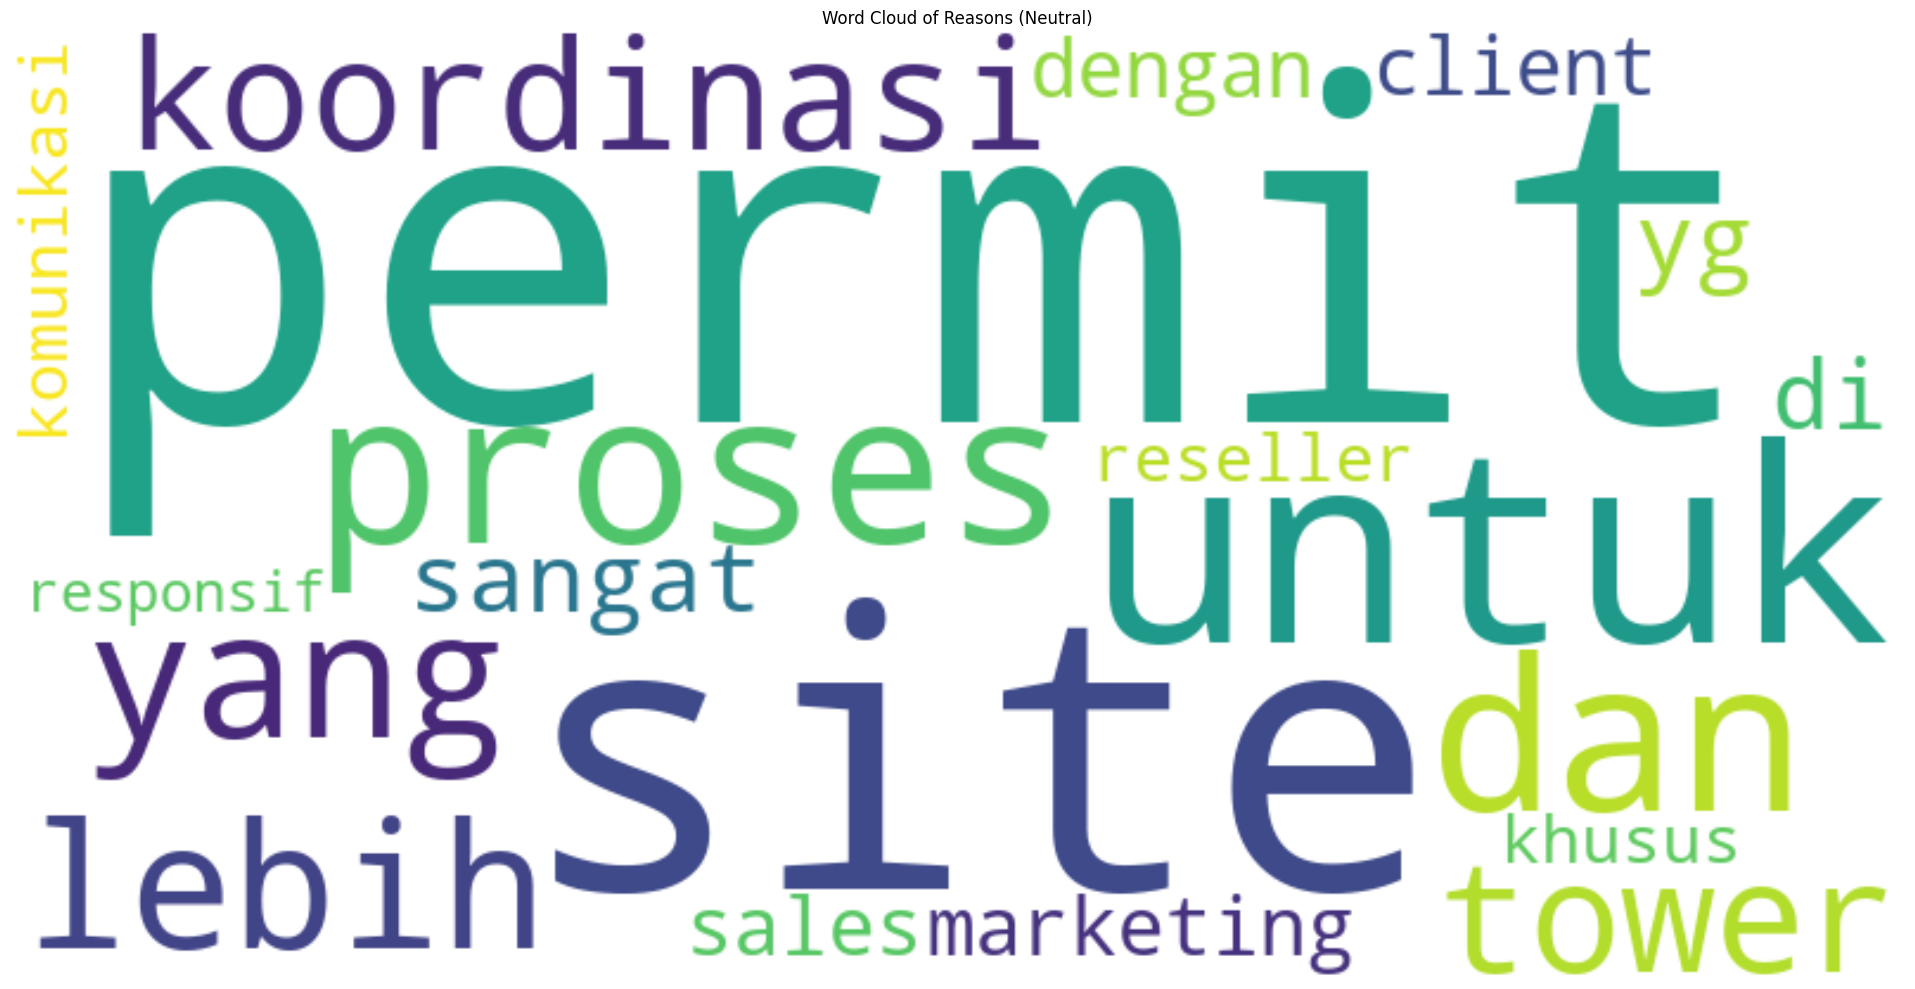

In [70]:
# Filter the dataset for the "Neutral" category
reasons_pro = df6[df6['nps_cat'] == 'Promoter']['reasons']

# Combine the reasons for the "Neutral" category
combined_reasons_pro = ' '.join(reasons_pro)

# Create a WordCloud object and generate the word cloud for the "Neutral" reasons
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=20).generate(combined_reasons_pro)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reasons (Neutral)')
plt.show()

In [71]:
proword = df6.loc[(df6['nps_cat']=='Promoter')&(df6['reasons'].str.contains('permit|site|proses|komunikasi|marketing|sales|koordinasi|tower|client'))]

In [72]:
proword.head()

,id,date,company,city,touchpoint,age,employment,satisfaction,recommend,reasons,nps_code,nps_cat,min_age,max_age,min_emp,max_emp
3,4,20/01/08,Customer_2,Semarang,Perizinan,41 - 45,16 - 20 Tahun,Puas,9,simplifikasi proses khusus utk site reseller,3,Promoter,41,45.0,16.0,20.0
11,13,20/01/17,Customer_2,Medan,Perizinan,41 - 45,16 - 20 Tahun,Sangat puas,10,tingkatkan terus koordinasi dan komunikasi,3,Promoter,41,45.0,16.0,20.0
19,21,20/01/25,Customer_2,Jayapura,Perizinan,36 - 40,11 - 15 Tahun,Puas,9,mungkin dibuatkan dashboard tracking release p...,3,Promoter,36,40.0,11.0,15.0
25,27,20/02/01,Customer_3,Jakarta,Perizinan,36 - 40,< 5 Tahun,Sangat puas,10,butuh improvement progress untuk perkuatan tow...,3,Promoter,36,40.0,NaN,5.0
27,29,20/02/03,Customer_4,Denpasar,Perizinan,> 50,6 - 10 Tahun,Sangat puas,9,"terkecuali tower sto, permit sudah sangat baik...",3,Promoter,50,NaN,6.0,10.0


In [73]:
export = proword[['id','company','satisfaction','recommend','reasons']]

In [74]:
# #Create the writer
# writer = pd.ExcelWriter('promoter_reasons.xlsx', engine='openpyxl')

# #Explrting datasets into excel sheets
# with pd.ExcelWriter('promoter_reasons.xlsx', engine='openpyxl') as writer:
#     export.to_excel(writer,sheet_name='promoter',index=False)

# 7. Reason Processing per Company

In [75]:
c1 = df6.loc[df6['company']=='Customer_1']
c2 = df6.loc[df6['company']=='Customer_2']
c3 = df6.loc[df6['company']=='Customer_3']
c4 = df6.loc[df6['company']=='Customer_4']
c5 = df6.loc[df6['company']=='Customer_5']

## Company 1

In [76]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the reasons column in each filtered dataset
reasons_detractor = c1[c1['nps_cat'] == 'Detractor']['reasons']
reasons_neutral = c1[c1['nps_cat'] == 'Neutral']['reasons']
reasons_promoter = c1[c1['nps_cat'] == 'Promoter']['reasons']

# Fit the vectorizer on the reasons data
reasons_detractor_vectorized = vectorizer.fit_transform(reasons_detractor)
reasons_neutral_vectorized = vectorizer.fit_transform(reasons_neutral)
reasons_promoter_vectorized = vectorizer.fit_transform(reasons_promoter)

# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names()

# Get the count of each feature in the reasons data
reasons_detractor_counts = reasons_detractor_vectorized.sum(axis=0).A1
reasons_neutral_counts = reasons_neutral_vectorized.sum(axis=0).A1
reasons_promoter_counts = reasons_promoter_vectorized.sum(axis=0).A1

# Create a dictionary of feature names and their counts
reasons_detractor_data = dict(zip(feature_names, reasons_detractor_counts))
reasons_neutral_data = dict(zip(feature_names, reasons_neutral_counts))
reasons_promoter_data = dict(zip(feature_names, reasons_promoter_counts))

# Sort the dictionaries based on the counts
reasons_detractor_sorted = sorted(reasons_detractor_data.items(), key=lambda x: x[1], reverse=True)
reasons_neutral_sorted = sorted(reasons_neutral_data.items(), key=lambda x: x[1], reverse=True)
reasons_promoter_sorted = sorted(reasons_promoter_data.items(), key=lambda x: x[1], reverse=True)

# Print the top reasons for each NPS category
print("Top reasons for Detractors:")
for reason, count in reasons_detractor_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Neutral:")
for reason, count in reasons_neutral_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Promoters:")
for reason, count in reasons_promoter_sorted[:10]:
    print(reason, count)
print()


Top reasons for Detractors:
responsif 3
coperative 2
lebih 2
yg 2
active 1
customer_6 1
dan 1
di 1
isu 1
kecepatan 1

Top reasons for Neutral:
customer_6 2
masalah 2
active 1
coperative 1
dan 1
di 1
isu 1
kecepatan 1
koordinasi 1
lebih 1

Top reasons for Promoters:
permit 3
proses 2
active 1
coperative 1
customer_6 1
dan 1
di 1
isu 1
kecepatan 1
koordinasi 1



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Company 2

In [77]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the reasons column in each filtered dataset
reasons_detractor = c2[c2['nps_cat'] == 'Detractor']['reasons']
reasons_neutral = c2[c2['nps_cat'] == 'Neutral']['reasons']
reasons_promoter = c2[c2['nps_cat'] == 'Promoter']['reasons']

# Fit the vectorizer on the reasons data
reasons_detractor_vectorized = vectorizer.fit_transform(reasons_detractor)
reasons_neutral_vectorized = vectorizer.fit_transform(reasons_neutral)
reasons_promoter_vectorized = vectorizer.fit_transform(reasons_promoter)

# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names()

# Get the count of each feature in the reasons data
reasons_detractor_counts = reasons_detractor_vectorized.sum(axis=0).A1
reasons_neutral_counts = reasons_neutral_vectorized.sum(axis=0).A1
reasons_promoter_counts = reasons_promoter_vectorized.sum(axis=0).A1

# Create a dictionary of feature names and their counts
reasons_detractor_data = dict(zip(feature_names, reasons_detractor_counts))
reasons_neutral_data = dict(zip(feature_names, reasons_neutral_counts))
reasons_promoter_data = dict(zip(feature_names, reasons_promoter_counts))

# Sort the dictionaries based on the counts
reasons_detractor_sorted = sorted(reasons_detractor_data.items(), key=lambda x: x[1], reverse=True)
reasons_neutral_sorted = sorted(reasons_neutral_data.items(), key=lambda x: x[1], reverse=True)
reasons_promoter_sorted = sorted(reasons_promoter_data.items(), key=lambda x: x[1], reverse=True)

# Print the top reasons for each NPS category
print("Top reasons for Detractors:")
for reason, count in reasons_detractor_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Neutral:")
for reason, count in reasons_neutral_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Promoters:")
for reason, count in reasons_promoter_sorted[:10]:
    print(reason, count)
print()


Top reasons for Detractors:
dibuatkan 9
issue 7
pengajuan 7
beberapa 6
kkst 6
komunikasi 5
ditawarkan 4
reseller 4
responsif 4
akan 3

Top reasons for Neutral:
database 5
tracking 4
client 3
hari 3
print 3
release 3
reseller 3
agar 2
banyak 2
diselesaikan 2

Top reasons for Promoters:
dan 5
permit 5
by 3
site 3
untuk 3
yang 3
client 2
dengan 2
ke 2
marketing 2



## Company 3

In [78]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the reasons column in each filtered dataset
reasons_detractor = c3[c3['nps_cat'] == 'Detractor']['reasons']
reasons_neutral = c3[c3['nps_cat'] == 'Neutral']['reasons']
reasons_promoter = c3[c3['nps_cat'] == 'Promoter']['reasons']

# Fit the vectorizer on the reasons data
reasons_detractor_vectorized = vectorizer.fit_transform(reasons_detractor)
reasons_neutral_vectorized = vectorizer.fit_transform(reasons_neutral)
reasons_promoter_vectorized = vectorizer.fit_transform(reasons_promoter)

# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names()

# Get the count of each feature in the reasons data
reasons_detractor_counts = reasons_detractor_vectorized.sum(axis=0).A1
reasons_neutral_counts = reasons_neutral_vectorized.sum(axis=0).A1
reasons_promoter_counts = reasons_promoter_vectorized.sum(axis=0).A1

# Create a dictionary of feature names and their counts
reasons_detractor_data = dict(zip(feature_names, reasons_detractor_counts))
reasons_neutral_data = dict(zip(feature_names, reasons_neutral_counts))
reasons_promoter_data = dict(zip(feature_names, reasons_promoter_counts))

# Sort the dictionaries based on the counts
reasons_detractor_sorted = sorted(reasons_detractor_data.items(), key=lambda x: x[1], reverse=True)
reasons_neutral_sorted = sorted(reasons_neutral_data.items(), key=lambda x: x[1], reverse=True)
reasons_promoter_sorted = sorted(reasons_promoter_data.items(), key=lambda x: x[1], reverse=True)

# Print the top reasons for each NPS category
print("Top reasons for Detractors:")
for reason, count in reasons_detractor_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Neutral:")
for reason, count in reasons_neutral_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Promoters:")
for reason, count in reasons_promoter_sorted[:10]:
    print(reason, count)
print()


Top reasons for Detractors:
customer_2 2
bisa 1
butuh 1
cepat 1
client 1
dalam 1
database 1
dengan 1
di 1
dipermudah 1

Top reasons for Neutral:
khusus 3
sales 3
kurang 2
mempunyai 2
pengeluaran 2
progress 2
tower 2
unit 2
untuk 2
bisa 1

Top reasons for Promoters:
site 3
untuk 3
customer_2 2
lebih 2
proses 2
unit 2
bisa 1
butuh 1
cepat 1
client 1



## Company 4

In [79]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the reasons column in each filtered dataset
reasons_detractor = c4[c4['nps_cat'] == 'Detractor']['reasons']
reasons_neutral = c4[c4['nps_cat'] == 'Neutral']['reasons']
reasons_promoter = c4[c4['nps_cat'] == 'Promoter']['reasons']

# Fit the vectorizer on the reasons data
reasons_detractor_vectorized = vectorizer.fit_transform(reasons_detractor)
reasons_neutral_vectorized = vectorizer.fit_transform(reasons_neutral)
reasons_promoter_vectorized = vectorizer.fit_transform(reasons_promoter)

# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names()

# Get the count of each feature in the reasons data
reasons_detractor_counts = reasons_detractor_vectorized.sum(axis=0).A1
reasons_neutral_counts = reasons_neutral_vectorized.sum(axis=0).A1
reasons_promoter_counts = reasons_promoter_vectorized.sum(axis=0).A1

# Create a dictionary of feature names and their counts
reasons_detractor_data = dict(zip(feature_names, reasons_detractor_counts))
reasons_neutral_data = dict(zip(feature_names, reasons_neutral_counts))
reasons_promoter_data = dict(zip(feature_names, reasons_promoter_counts))

# Sort the dictionaries based on the counts
reasons_detractor_sorted = sorted(reasons_detractor_data.items(), key=lambda x: x[1], reverse=True)
reasons_neutral_sorted = sorted(reasons_neutral_data.items(), key=lambda x: x[1], reverse=True)
reasons_promoter_sorted = sorted(reasons_promoter_data.items(), key=lambda x: x[1], reverse=True)

# Print the top reasons for each NPS category
print("Top reasons for Detractors:")
for reason, count in reasons_detractor_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Neutral:")
for reason, count in reasons_neutral_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Promoters:")
for reason, count in reasons_promoter_sorted[:10]:
    print(reason, count)
print()


Top reasons for Detractors:
pelayanannya 3
tower 3
prosesnya 2
terkecuali 2
agar 1
akses 1
atau 1
baik 1
dipercepat 1
dipermudah 1

Top reasons for Neutral:
tower 3
lagi 2
permit 2
proses 2
agar 1
akses 1
atau 1
baik 1
dipercepat 1
dipermudah 1

Top reasons for Promoters:
permit 2
agar 1
akses 1
atau 1
baik 1
dipercepat 1
dipermudah 1
izin 1
kemudahan 1
kerja 1



## Company 5

In [80]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the reasons column in each filtered dataset
reasons_detractor = c5[c5['nps_cat'] == 'Detractor']['reasons']
reasons_neutral = c5[c5['nps_cat'] == 'Neutral']['reasons']
reasons_promoter = c5[c5['nps_cat'] == 'Promoter']['reasons']

# Fit the vectorizer on the reasons data
reasons_detractor_vectorized = vectorizer.fit_transform(reasons_detractor)
reasons_neutral_vectorized = vectorizer.fit_transform(reasons_neutral)
reasons_promoter_vectorized = vectorizer.fit_transform(reasons_promoter)

# Get the feature names (words or phrases)
feature_names = vectorizer.get_feature_names()

# Get the count of each feature in the reasons data
reasons_detractor_counts = reasons_detractor_vectorized.sum(axis=0).A1
reasons_neutral_counts = reasons_neutral_vectorized.sum(axis=0).A1
reasons_promoter_counts = reasons_promoter_vectorized.sum(axis=0).A1

# Create a dictionary of feature names and their counts
reasons_detractor_data = dict(zip(feature_names, reasons_detractor_counts))
reasons_neutral_data = dict(zip(feature_names, reasons_neutral_counts))
reasons_promoter_data = dict(zip(feature_names, reasons_promoter_counts))

# Sort the dictionaries based on the counts
reasons_detractor_sorted = sorted(reasons_detractor_data.items(), key=lambda x: x[1], reverse=True)
reasons_neutral_sorted = sorted(reasons_neutral_data.items(), key=lambda x: x[1], reverse=True)
reasons_promoter_sorted = sorted(reasons_promoter_data.items(), key=lambda x: x[1], reverse=True)

# Print the top reasons for each NPS category
print("Top reasons for Detractors:")
for reason, count in reasons_detractor_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Neutral:")
for reason, count in reasons_neutral_sorted[:10]:
    print(reason, count)
print()

print("Top reasons for Promoters:")
for reason, count in reasons_promoter_sorted[:10]:
    print(reason, count)
print()


Top reasons for Detractors:
sangat 2
sekarang 2
bagus 1
ini 1
sudah 1

Top reasons for Neutral:
bagus 1
ini 1
sangat 1
sekarang 1
sudah 1

Top reasons for Promoters:
bagus 1
ini 1
sangat 1
sekarang 1
sudah 1



# 8. Reasons Variable Crosscheck

In [81]:
df7 = df6.copy()

## Customer 1

In [82]:
cust1 = df7.loc[df7['company']=='Customer_1']

In [83]:
cust1[['reasons']]

,reasons
0,"untuk saat ini sudah baik, namun ada baiknya s..."
7,respond time
8,respond time
9,koordinasi ditingkatkan
10,no comment
21,responsif
37,percepatan proses permit site customer_6
43,"untuk permit sulawesi sudah cepat, untuk kal..."
51,kecepatan proses permit sesuai sla
60,request permit untuk akses site seringkali low...


## Customer 3

In [84]:
cust3 = df7.loc[df7['company']=='Customer_3']

In [85]:
cust3[['reasons']]

,reasons
1,perlu nya koordinasi yang bagus internal mitra...
12,respons yang cepat dari team client untuk seti...
16,koordinasi dan regular meeting
17,proses permit site under customer_6 group
25,butuh improvement progress untuk perkuatan tow...
26,koordinasi
29,koordinasi
34,proses pengeluaran ijin activity di site sanga...
40,khusus untuk proses permit di site customer_2 ...
45,proses pengeluaran ijin pasang perangkat untuk...


## Crosscheck Reasons For Age < 36

In [86]:
test = df7.loc[(df7['age']=='16 - 20') | (df7['age']=='21 - 25') | (df7['age']=='26 - 30') | (df7['age']=='31 - 35')]

In [87]:
agecheck = test.loc[(test['satisfaction'] == 'Sangat puas')|(test['satisfaction']=='Puas')]
agecheck[['reasons']]

,reasons
15,memberikan actual sesuai plan
50,respon case sangat lambat
57,percepatan permit untuk site re-seller
59,dipermudah untuk proses request permit atau iz...
75,"percepatan proses caf, percepatan izin site2 ..."
79,agar lebih responsive
80,sebaiknya unit marketing mempunyai database ya...
81,"lebih active dan coperative,"
82,intensitas team sales client dalam melakukan k...
83,untuk marketing dan sales regional yang berhub...


In [91]:
len(df7.loc[df7['nps_cat']=='Neutral'])

50

array(['Neutral', 'Promoter', 'Detractor'], dtype=object)